In [1908]:
import warnings
warnings.filterwarnings('ignore')

In [1909]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
sns.set()

In [1910]:
bikes=pd.read_csv('day.csv')
bikes.shape

(730, 16)

In [1911]:
bikes.head(20)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [1912]:
bikes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1913]:
bikes.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1914]:
#Lets check for null values in each of the columns
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [1915]:
bikes['dteday']=pd.to_datetime(bikes['dteday'],format='%d-%m-%Y')
bikes['dteday'].dtype

dtype('<M8[ns]')

In [1916]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1917]:
#Derive column yesr and month from dteday
bikes['year']=pd.DatetimeIndex(bikes['dteday']).year
bikes['month']=pd.DatetimeIndex(bikes['dteday']).month

In [1918]:
#drop yr and month columns since we have extracted correct year and month from dteday column
bikes.drop(columns=['yr','mnth'],axis=1,inplace=True)

In [1919]:
bikes.head()


,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [1920]:
bikes.shape

(730, 16)

In [1921]:
#lets drop instant ,dteday,casual, registered and holiday columns
#holiday column->workingday column will take care of it , hence dropping
#instant column -> doesnt have any significance
#dte day -> have already extracted year and month from it
#casual and registered sum is displayed in cnt column so can be dropped
bikes.drop(columns=['dteday','instant','casual','registered','holiday'],axis=1,inplace=True)

In [1922]:
bikes.head()


,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


In [1923]:
bikes.shape

(730, 11)

In [1924]:
bikes.weathersit.unique()

array([2, 1, 3])

In [1925]:
#Make a Copy before encoding
bikes_before_enc = bikes.copy()

### Lets Encode few columns and see the stats

In [1927]:
#lets encode year column and check the frequency of the count using bar plot
codes = {2019:1,2018:0}
bikes['year'] = bikes['year'].map(codes)

#encode weathersit
codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
bikes['weathersit'] = bikes['weathersit'].map(codes)

#encode season
codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
bikes['season'] = bikes['season'].map(codes)

#lets encode working day where working day will be 1 and weekend or holiday will be zero
# we will then plot the frequency of usage
codes = {1:'working_day',0:'Holiday'}
bikes['workingday'] = bikes['workingday'].map(codes)

#let us also do a month wise usage mapping and then plot graph to see which month has more usage on year to year
#basis i.e comparing Jan of 2018 with Jan of 2019 , so on and so forth
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bikes['month'] = bikes['month'].map(codes)

#lets do the same for weekday usage as well
codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bikes['weekday'] = bikes['weekday'].map(codes)

In [1928]:
bikes.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,spring,Sun,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,985,0,Jan
1,spring,Mon,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,801,0,Jan
2,spring,Tue,working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,Jan
3,spring,Wed,working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,Jan
4,spring,Thu,working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,Jan


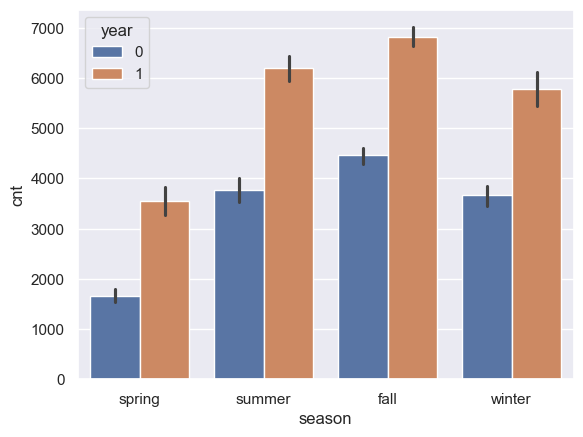

In [1929]:
sns.barplot(x = 'season',
            y = 'cnt',hue = 'year',
            data = bikes)
 
# Show the plot
plt.show()

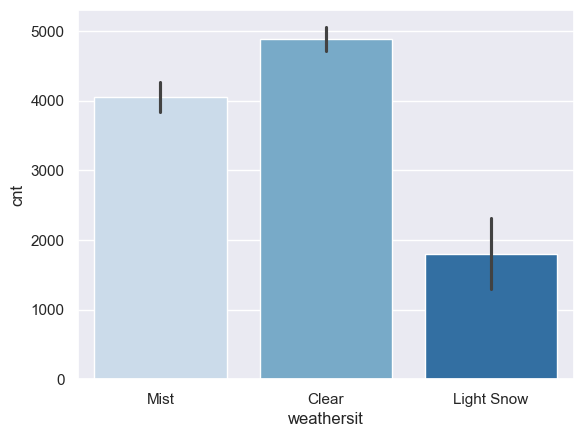

In [1930]:
sns.barplot(x = 'weathersit',
            y = 'cnt',
            data = bikes,palette = "Blues")
 
# Show the plot
plt.show()

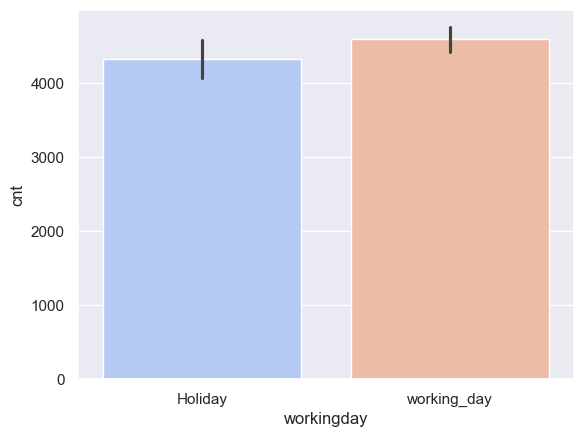

In [1931]:
sns.barplot(x ='workingday',y='cnt',data=bikes,palette='coolwarm')
plt.show()

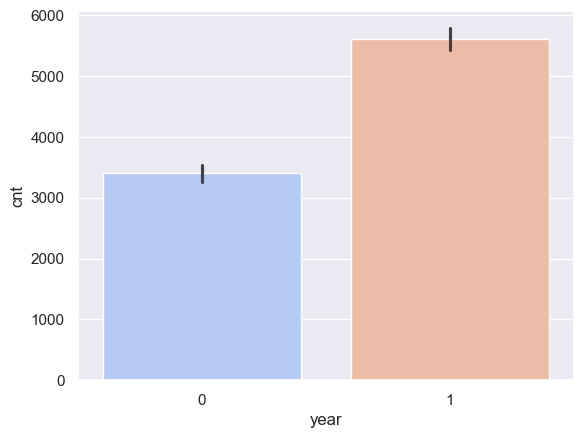

In [1932]:
sns.barplot(x='year',y='cnt',data=bikes,palette='coolwarm')
plt.show()

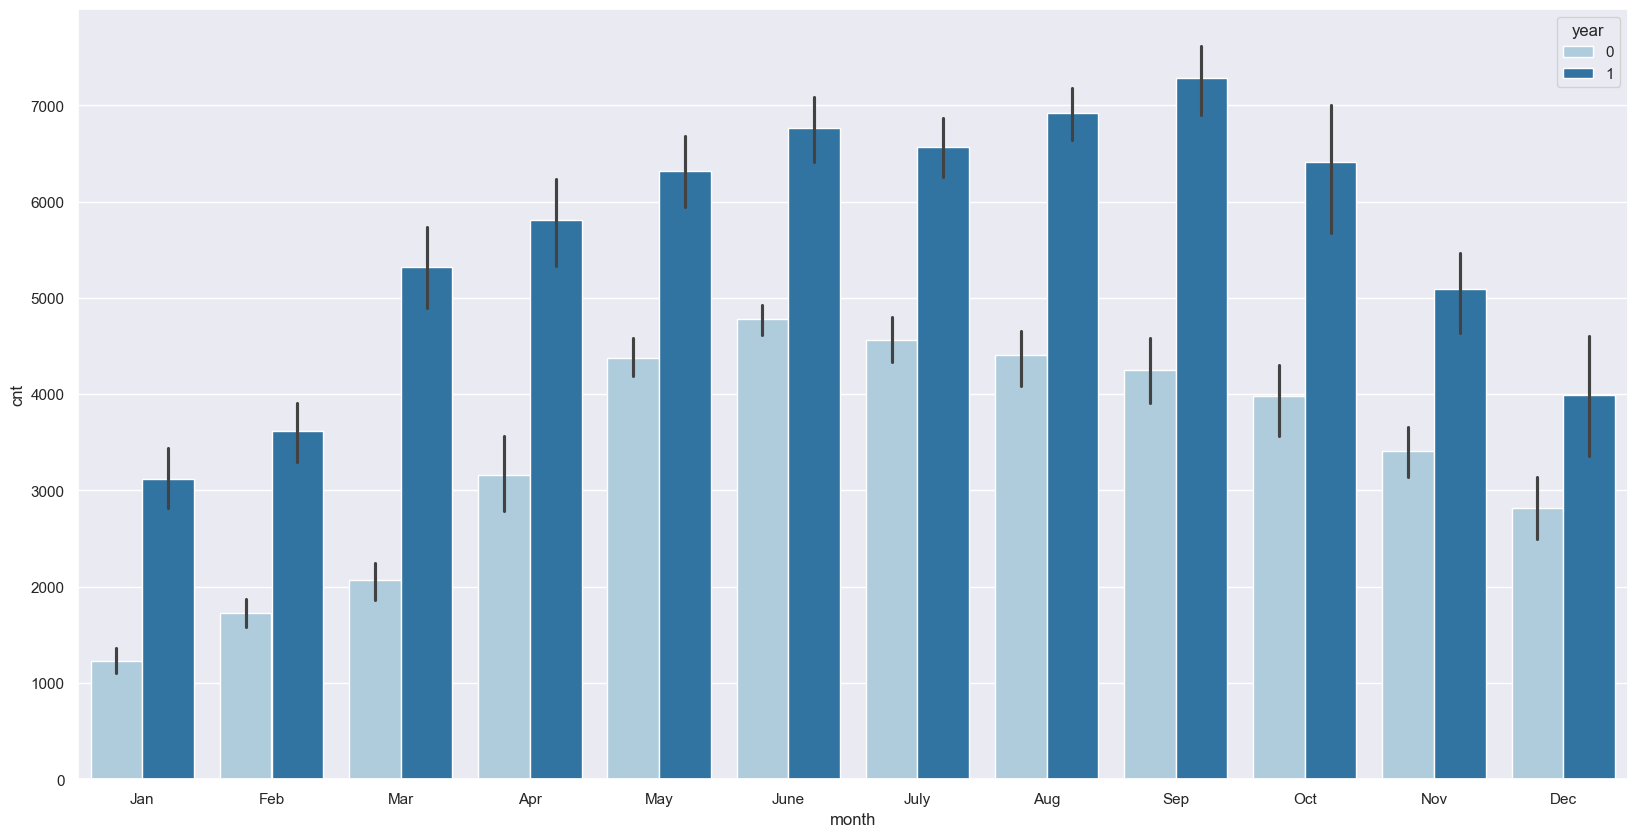

In [1933]:
plt.figure(figsize=(20,10))
sns.barplot(x='month',y='cnt',hue='year',data=bikes,palette='Paired')
plt.show()

### conclusion 
- avg bike usage is less only during spring season
- avg bike usage is more during clear weather season
- avg bikes are rented more on working days
- avg bikes usage has bee more during 2019 than it was during 2018 .


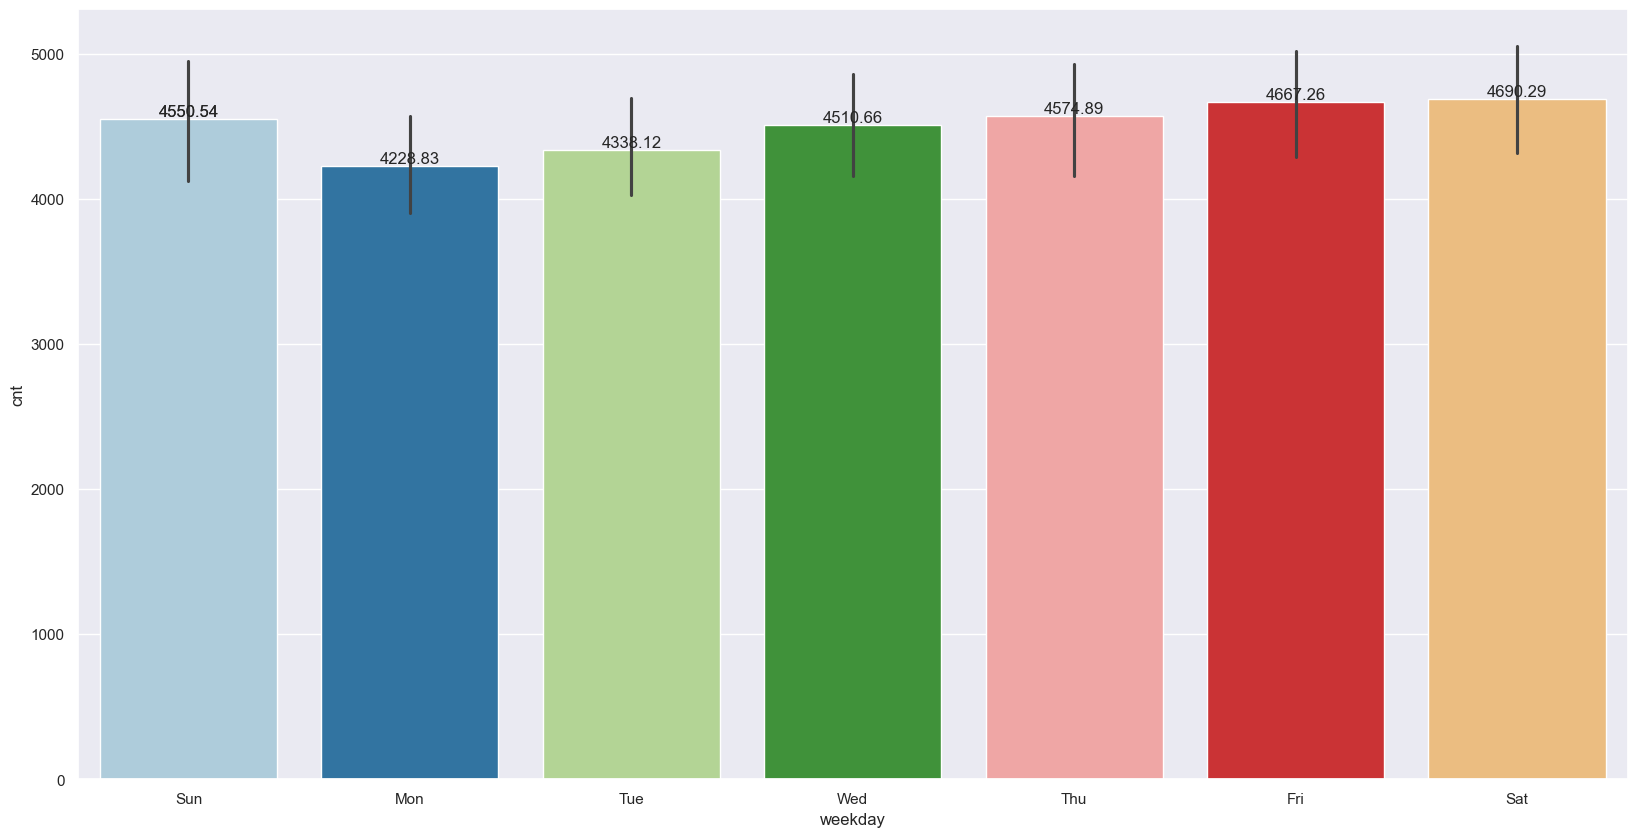

In [1935]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x='weekday',y='cnt',data=bikes,palette='Paired')
ax.bar_label(ax.containers[0])
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [1936]:
bikes.groupby('weekday')['cnt'].mean()


weekday
Fri    4667.259615
Mon    4228.828571
Sat    4690.288462
Sun    4550.542857
Thu    4574.893204
Tue    4338.123810
Wed    4510.663462
Name: cnt, dtype: float64

### Conclusion 
- Friday and Saturday more vehicles are rented in an avg

### Plot cnt against weather like temp,atemp,humidity and windspeed


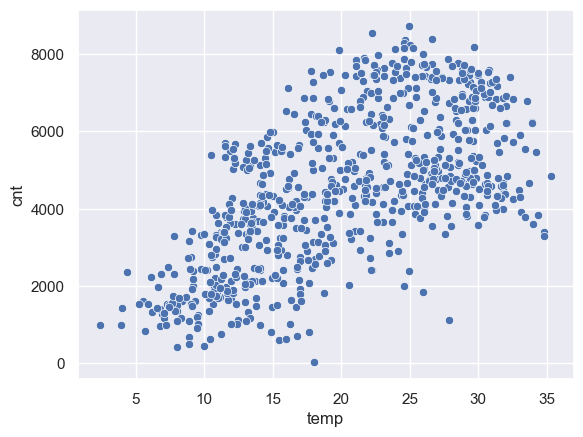

In [1939]:
sns.scatterplot(x='temp',y='cnt',data=bikes)
plt.show()

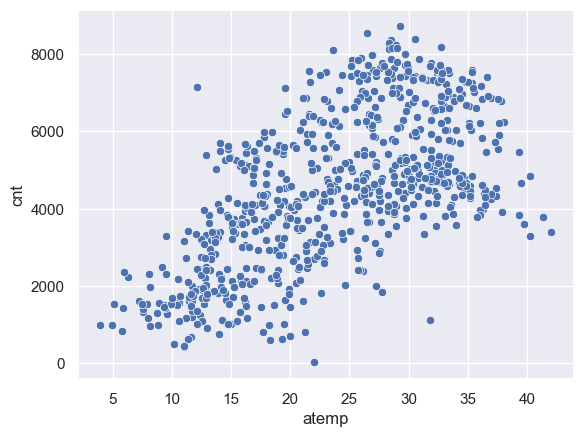

In [1940]:
sns.scatterplot(x='atemp',y='cnt',data=bikes)
plt.show()


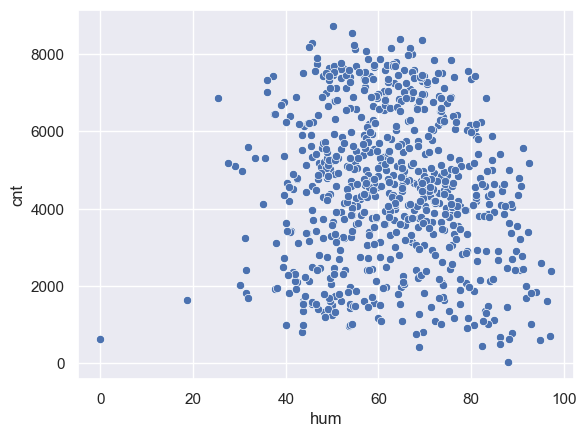

In [1941]:
sns.scatterplot(x='hum',y='cnt',data=bikes)
plt.show()


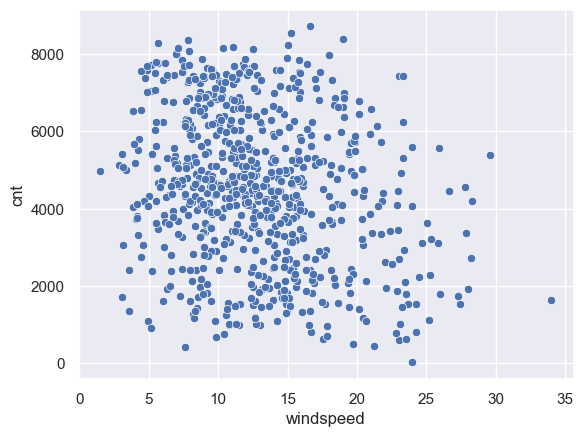

In [1942]:
sns.scatterplot(x='windspeed',y='cnt',data=bikes)
plt.show()


### Conclusion 
- With increase in temp the cnt increase
- Upto certain exten there is a liner relationship but after that many data points shows the decrease in count with increase in hum
- with extreme windspeed it seems the demand is decreasing .

### Lets plot the pairplot and heatmap to see the correlation

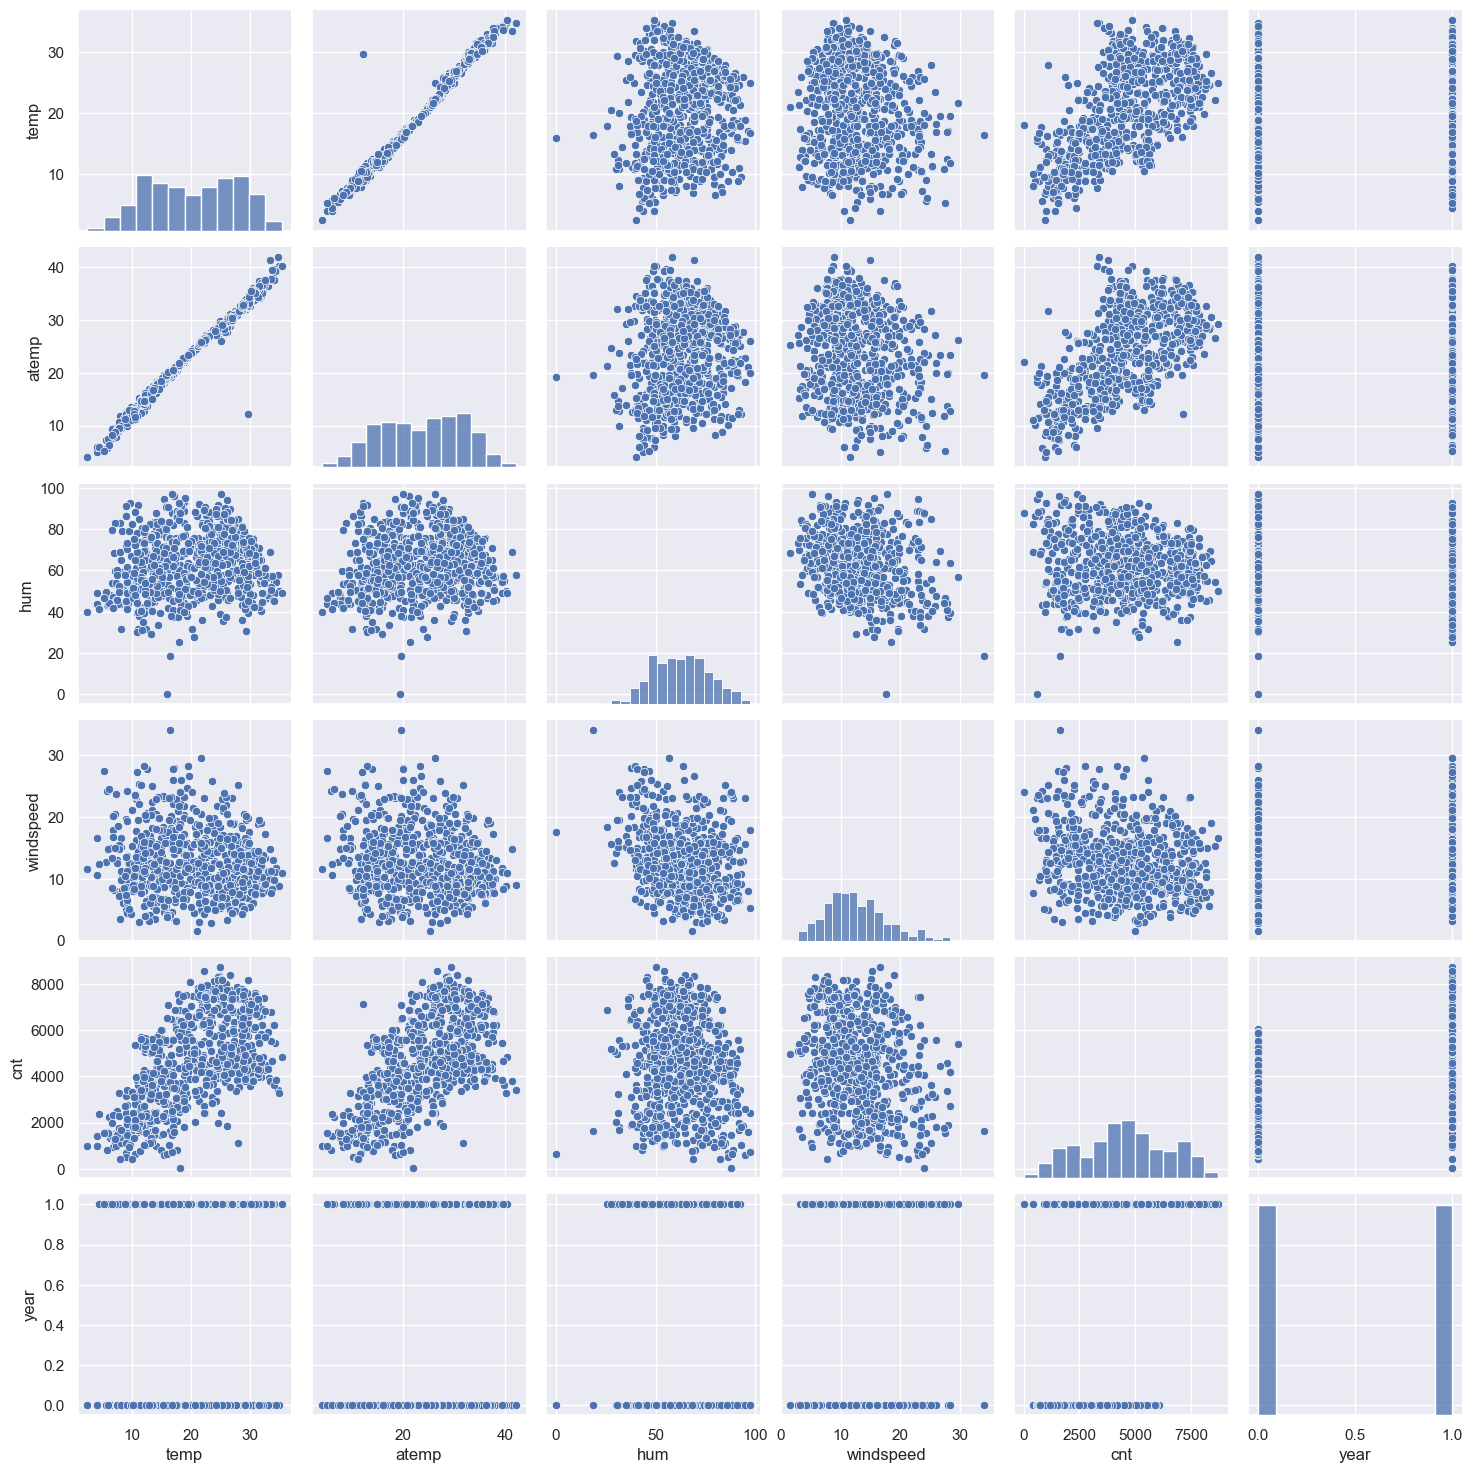

In [1945]:
sns.pairplot(bikes)
plt.show()

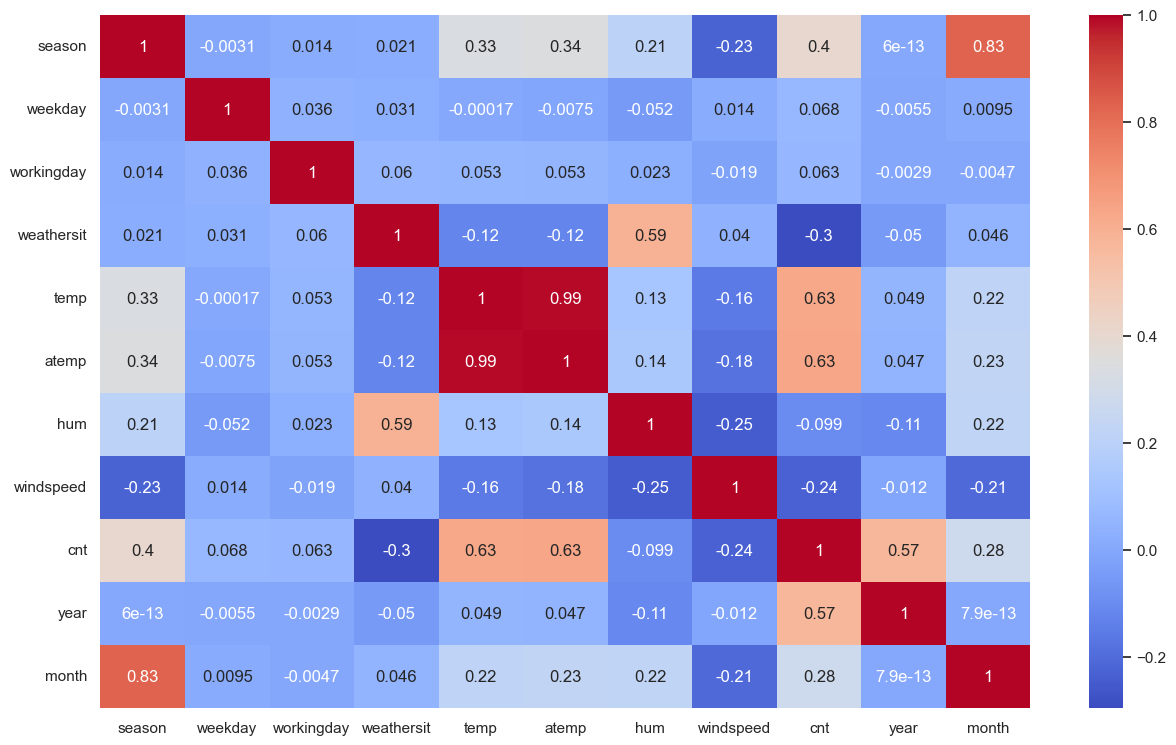

In [1946]:
plt.figure(figsize=(15,9))
sns.heatmap(bikes_before_enc.corr(),annot=True,cmap='coolwarm')
plt.show()

### From above temp and atemp are highly correlated so lets drop

In [1948]:
#Dropping atemp
bikes.drop('atemp',axis=1,inplace=True)


In [1949]:
bikes.head()

,season,weekday,workingday,weathersit,temp,hum,windspeed,cnt,year,month
0,spring,Sun,Holiday,Mist,14.110847,80.5833,10.749882,985,0,Jan
1,spring,Mon,Holiday,Mist,14.902598,69.6087,16.652113,801,0,Jan
2,spring,Tue,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan
3,spring,Wed,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan
4,spring,Thu,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan


### Create Dummy variables


In [1951]:
week_day= pd.get_dummies(bikes['weekday'],drop_first=True)
seasons = pd.get_dummies(bikes['season'],drop_first=True)
weathersit= pd.get_dummies(bikes['weathersit'],drop_first=True)
working_day = pd.get_dummies(bikes['workingday'],drop_first=True)
month= pd.get_dummies(bikes['month'],drop_first=True)

In [1952]:
#Join the dummy variables to the dataset and drop the original column
bikes= pd.concat([bikes,seasons,week_day,working_day,weathersit,month],axis=1)
bikes.drop(columns=['season','weekday','workingday','weathersit','month'],axis=1,inplace=True)

In [1953]:
bikes.head()

,temp,hum,windspeed,cnt,year,spring,summer,winter,Mon,Sat,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,14.110847,80.5833,10.749882,985,0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,14.902598,69.6087,16.652113,801,0,True,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
2,8.050924,43.7273,16.636703,1349,0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,8.200000,59.0435,10.739832,1562,0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,9.305237,43.6957,12.522300,1600,0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


## Split the data to train and test and build the model training 

In [1955]:
from sklearn.model_selection import train_test_split
bike_train, bike_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

#### temp,hum,windspeed and cnt are not in scale so lets standardize

In [1957]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

#apply scaling to all the columns except dummy variables
scaling_vars=['temp','hum','windspeed','cnt']
bike_train[scaling_vars]= scaler.fit_transform(bike_train[scaling_vars])

In [1958]:
bike_train.head()

,temp,hum,windspeed,cnt,year,spring,summer,winter,Mon,Sat,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
653,-0.121335,-0.514725,-0.117752,1.562685,1,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
576,1.231731,0.516433,-0.330615,1.399629,1,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
426,-0.420478,-0.069854,-0.385694,-0.215554,1,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
728,-1.294913,-1.045032,2.018143,-1.379511,1,True,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
482,-0.627580,-1.000840,-0.779889,-0.136589,1,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1959]:
bike_train.shape

(510, 28)

In [1960]:
bike_test.shape

(219, 28)

In [1961]:
bike_train.describe()

,temp,hum,windspeed,cnt,year
count,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000
mean,-2.385891e-16,-3.831358e-16,-2.263984e-16,-5.224579e-17,0.507843
std,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.500429
min,-2.381246e+00,-4.462565e+00,-1.890981e+00,-2.289141e+00,0.000000
25%,-8.749555e-01,-7.666192e-01,-7.167878e-01,-7.006213e-01,0.000000
50%,1.443562e-02,2.294988e-02,-1.415145e-01,2.236523e-02,1.000000
75%,8.773604e-01,7.167702e-01,5.522525e-01,7.625291e-01,1.000000
max,2.050938e+00,2.399023e+00,4.004188e+00,2.167738e+00,1.000000


In [1962]:
y_train=bike_train.pop('cnt')
X_train=bike_train

In [1963]:
y_train.shape

(510,)

In [1964]:
X_train.shape

(510, 27)

### Note Important on how to remove independent columns 
#### We can initially include all the attributes then calulate R square and VIF and decide what to be removed .

## For Now Lets use RFE inbuild lib to decide the columns 

In [1967]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1968]:
lm =LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,n_features_to_select=16)
rfe=rfe.fit(X_train,y_train)

In [1969]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('temp', True, 1),
 ('hum', False, 4),
 ('windspeed', False, 2),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 9),
 ('Sun', True, 1),
 ('Thu', False, 10),
 ('Tue', False, 6),
 ('Wed', False, 7),
 ('working_day', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 5),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 12),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 8),
 ('Sep', True, 1)]

In [1970]:
#select only those columns where rfe is supported is True
col = X_train.columns[rfe.support_]
col

Index(['temp', 'year', 'spring', 'summer', 'winter', 'Mon', 'Sun',
       'working_day', 'Light Snow', 'Mist', 'Dec', 'Feb', 'Jan', 'July', 'Nov',
       'Sep'],
      dtype='object')

### Build a model with stats model and see the statistics

In [1972]:
#create a x train data frame with rfe selected variables 

In [1973]:
X_train_rfe=X_train[col]
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [1974]:
X_train_rfe.head()

,const,temp,year,spring,summer,winter,Mon,Sun,working_day,Light Snow,Mist,Dec,Feb,Jan,July,Nov,Sep
653,1.0,-0.121335,1,False,False,True,False,False,True,False,False,False,False,False,False,False,False
576,1.0,1.231731,1,False,False,False,False,False,True,False,False,False,False,False,True,False,False
426,1.0,-0.420478,1,True,False,False,False,True,False,False,True,False,False,False,False,False,False
728,1.0,-1.294913,1,True,False,False,True,False,False,False,False,True,False,False,False,False,False
482,1.0,-0.627580,1,False,True,False,False,True,False,False,True,False,False,False,False,False,False


In [1975]:
# in video get dummies replaced with 0 or 1 ,but here i see True or False .lets modify that .

varlist =  ['spring', 'summer', 'winter', 'Mon', 'Sun',
       'working_day', 'Light Snow', 'Mist', 'Dec', 'Feb', 'Jan', 'July', 'Nov',
       'Sep']

# Defining the map function
def binary_map(x):
    return x.map({False: 0, True: 1})

# Applying the function to the housing list
X_train_rfe[varlist] = X_train_rfe[varlist].apply(binary_map)

In [1976]:
X_train_rfe.head()

,const,temp,year,spring,summer,winter,Mon,Sun,working_day,Light Snow,Mist,Dec,Feb,Jan,July,Nov,Sep
653,1.0,-0.121335,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
576,1.0,1.231731,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
426,1.0,-0.420478,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0
728,1.0,-1.294913,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
482,1.0,-0.627580,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0


In [1977]:
lm = sm.OLS(y_train,X_train_rfe).fit()


In [1978]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     154.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.68e-180
Time:                        22:28:56   Log-Likelihood:                -266.05
No. Observations:                 510   AIC:                             566.1
Df Residuals:                     493   BIC:                             638.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7567      0.137     -5.525      

### Observation from the summary
- Feb having p value > 5% so can be dropped

In [1980]:
#based on the data above , lets drop  Feb 
X_train_upd1= X_train_rfe.drop(['Feb'],axis=1)

In [1981]:
X_train1_upd1.head()

,const,temp,year,spring,summer,winter,Mon,Sun,working_day,Light Snow,Mist,Dec,Jan,July,Nov,Sep
653,1.0,-0.121335,1,0,0,1,0,0,1,0,0,0,0,0,0,0
576,1.0,1.231731,1,0,0,0,0,0,1,0,0,0,0,1,0,0
426,1.0,-0.420478,1,1,0,0,0,1,0,0,1,0,0,0,0,0
728,1.0,-1.294913,1,1,0,0,1,0,0,0,0,1,0,0,0,0
482,1.0,-0.627580,1,0,1,0,0,1,0,0,1,0,0,0,0,0


In [1982]:
X_train_upd2= sm.add_constant(X_train_upd1)
lm1 = sm.OLS(y_train,X_train_upd2).fit()
X_train_upd2.head()

,const,temp,year,spring,summer,winter,Mon,Sun,working_day,Light Snow,Mist,Dec,Jan,July,Nov,Sep
653,1.0,-0.121335,1,0,0,1,0,0,1,0,0,0,0,0,0,0
576,1.0,1.231731,1,0,0,0,0,0,1,0,0,0,0,1,0,0
426,1.0,-0.420478,1,1,0,0,0,1,0,0,1,0,0,0,0,0
728,1.0,-1.294913,1,1,0,0,1,0,0,0,0,1,0,0,0,0
482,1.0,-0.627580,1,0,1,0,0,1,0,0,1,0,0,0,0,0


In [1983]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          5.34e-181
Time:                        22:28:56   Log-Likelihood:                -267.05
No. Observations:                 510   AIC:                             566.1
Df Residuals:                     494   BIC:                             633.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7813      0.136     -5.748      

### Observation from the summary
- summer having p value > 5% so can be dropped

In [1985]:
#based on the data above , lets drop  Feb 
X_train_upd3= X_train_upd2.drop(['summer'],axis=1)

In [1986]:
X_train1_upd3.head()

,const,temp,year,spring,winter,Mon,Sun,working_day,Light Snow,Mist,Dec,Jan,July,Nov,Sep
653,1.0,-0.121335,1,0,1,0,0,1,0,0,0,0,0,0,0
576,1.0,1.231731,1,0,0,0,0,1,0,0,0,0,1,0,0
426,1.0,-0.420478,1,1,0,0,1,0,0,1,0,0,0,0,0
728,1.0,-1.294913,1,1,0,1,0,0,0,0,1,0,0,0,0
482,1.0,-0.627580,1,0,0,0,1,0,0,1,0,0,0,0,0


In [1987]:
X_train_upd4= sm.add_constant(X_train_upd3)
lm2 = sm.OLS(y_train,X_train_upd4).fit()
X_train_upd4.head()

,const,temp,year,spring,winter,Mon,Sun,working_day,Light Snow,Mist,Dec,Jan,July,Nov,Sep
653,1.0,-0.121335,1,0,1,0,0,1,0,0,0,0,0,0,0
576,1.0,1.231731,1,0,0,0,0,1,0,0,0,0,1,0,0
426,1.0,-0.420478,1,1,0,0,1,0,0,1,0,0,0,0,0
728,1.0,-1.294913,1,1,0,1,0,0,0,0,1,0,0,0,0
482,1.0,-0.627580,1,0,0,0,1,0,0,1,0,0,0,0,0


In [1988]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     175.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.47e-181
Time:                        22:28:56   Log-Likelihood:                -268.41
No. Observations:                 510   AIC:                             566.8
Df Residuals:                     495   BIC:                             630.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.6913      0.124     -5.557      

### Observation from the summary
- Mon having p value > 5% so can be dropped

In [1990]:
#based on the data above , lets drop  Feb 
X_train_upd5= X_train_upd4.drop(['Mon'],axis=1)

In [1991]:
X_train_upd5.head()

,const,temp,year,spring,winter,Sun,working_day,Light Snow,Mist,Dec,Jan,July,Nov,Sep
653,1.0,-0.121335,1,0,1,0,1,0,0,0,0,0,0,0
576,1.0,1.231731,1,0,0,0,1,0,0,0,0,1,0,0
426,1.0,-0.420478,1,1,0,1,0,0,1,0,0,0,0,0
728,1.0,-1.294913,1,1,0,0,0,0,0,1,0,0,0,0
482,1.0,-0.627580,1,0,0,1,0,0,1,0,0,0,0,0


In [1992]:
X_train_upd6= sm.add_constant(X_train_upd5)
lm3 = sm.OLS(y_train,X_train_upd6).fit()
X_train_upd6.head()

,const,temp,year,spring,winter,Sun,working_day,Light Snow,Mist,Dec,Jan,July,Nov,Sep
653,1.0,-0.121335,1,0,1,0,1,0,0,0,0,0,0,0
576,1.0,1.231731,1,0,0,0,1,0,0,0,0,1,0,0
426,1.0,-0.420478,1,1,0,1,0,0,1,0,0,0,0,0
728,1.0,-1.294913,1,1,0,0,0,0,0,1,0,0,0,0
482,1.0,-0.627580,1,0,0,1,0,0,1,0,0,0,0,0


In [1993]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     187.8
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          5.55e-182
Time:                        22:28:56   Log-Likelihood:                -270.13
No. Observations:                 510   AIC:                             568.3
Df Residuals:                     496   BIC:                             627.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4910      0.059     -8.299      

In [1994]:
X_train_upd6.columns

Index(['const', 'temp', 'year', 'spring', 'winter', 'Sun', 'working_day',
       'Light Snow', 'Mist', 'Dec', 'Jan', 'July', 'Nov', 'Sep'],
      dtype='object')

### Lets calulate VIF and see the significance 

In [1996]:
X_train_upd7=X_train_upd6.drop(['const'],axis=1)

In [1997]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_upd6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.28
1,temp,3.19
3,spring,2.73
4,winter,2.27
12,Nov,1.68
6,working_day,1.65
5,Sun,1.64
10,Jan,1.59
9,Dec,1.42
11,July,1.30


### Observations
- All the VIF values are under 5 so we ae good

### Plot the distribution of Error 

In [2000]:
y_train_pred = lm3.predict(X_train_upd6)


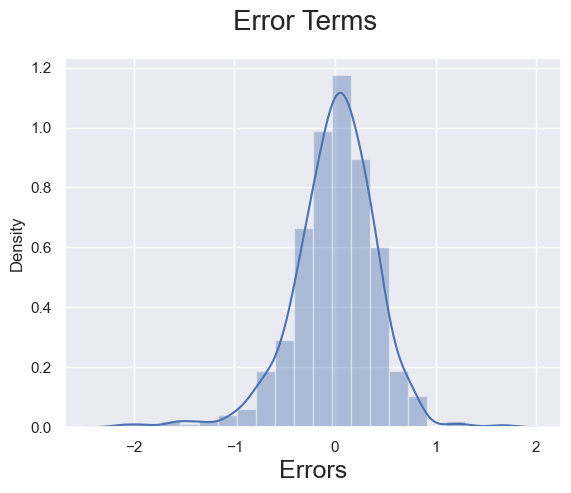

In [2001]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

### Lets verify the model on the test set

In [2003]:
bike_test.shape

(219, 28)

In [2004]:
bike_test.head()

,temp,hum,windspeed,cnt,year,spring,summer,winter,Mon,Sat,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
184,29.793347,63.7917,5.459106,6043,0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
535,32.082500,59.2083,7.625404,6211,1,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
299,19.270000,81.2917,13.250121,2659,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
221,31.433347,42.4167,13.417286,4780,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
152,29.315000,30.5000,19.583229,4968,0,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [2005]:
scal_vars=['temp','hum','windspeed','cnt']

bike_test[scal_vars]= scaler.transform(bike_test[scal_vars])

In [2006]:
bike_test.head()

,temp,hum,windspeed,cnt,year,spring,summer,winter,Mon,Sat,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
184,1.305371,0.047995,-1.394498,0.798166,0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
535,1.613721,-0.276087,-0.984730,0.884309,1,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
299,-0.112129,1.285378,0.079219,-0.937002,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
221,1.526280,-1.463381,0.110839,0.150554,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
152,1.240938,-2.305983,1.277165,0.246953,0,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [2007]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [2008]:
X_test_new = X_test[X_train_upd7.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [2009]:
X_test_new.head()

,const,temp,year,spring,winter,Sun,working_day,Light Snow,Mist,Dec,Jan,July,Nov,Sep
184,1.0,1.305371,0,False,False,False,False,False,True,False,False,True,False,False
535,1.0,1.613721,1,False,False,False,True,False,False,False,False,False,False,False
299,1.0,-0.112129,0,False,True,False,True,False,True,False,False,False,False,False
221,1.0,1.526280,0,False,False,False,True,False,False,False,False,False,False,False
152,1.0,1.240938,0,False,False,False,True,False,False,False,False,False,False,False


In [2010]:
y_test_pred = lm3.predict(X_test_new)

In [2011]:
y_test_pred

184   -0.549824
535    1.496318
299   -0.312187
221    0.416894
152     0.29334
         ...   
400   -0.829771
702     0.91174
127   -0.400051
640    1.177756
72    -1.119414
Length: 219, dtype: object

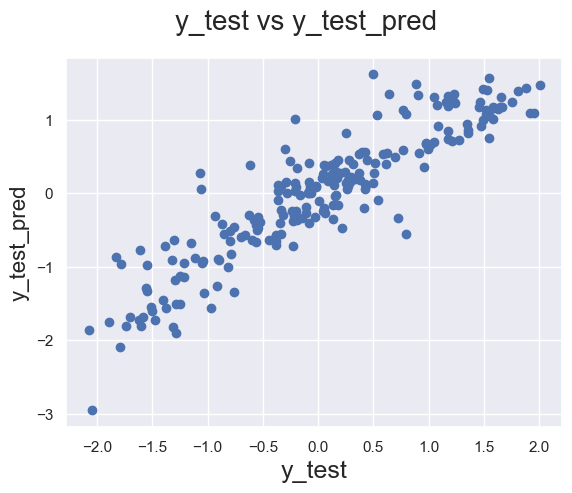

In [2012]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

In [2013]:
#r2 score of the test set
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8244530300044715

In [2014]:
#r2 score of the training set
r2_score(y_train, y_train_pred)

0.83111502659626

In [2015]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     187.8
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          5.55e-182
Time:                        22:28:56   Log-Likelihood:                -270.13
No. Observations:                 510   AIC:                             568.3
Df Residuals:                     496   BIC:                             627.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4910      0.059     -8.299      

### Summary as follow
- The summary of the model after data interpretation, visualisation, data-preparation, model building and training, residual analysis and evaluation of test model are as follows-
- R square value is - 0.831 on train data set and .824 in test which suggests that our model broadly explains the variance quite accurately on the test set and thus we can conclude that it is a good model.
- "Working day or not" and temperature are the important parameters for determining the bike demands.
- Bike uses less during spring .
- Rentals were more in 2019 than 2018 which suggests that more customers were added and efforts must be made to retain all the existing customers so that new customers will keep coming due to the trend.
- We had observed that the months of Aug,September and October had higher use of rentals.